<a href="https://colab.research.google.com/github/EdwardWendling/Ativos-x-SELIC/blob/main/Ativos_x_SELIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


In [4]:
def extracao_bcb(codigo, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  df = pd.read_json(url)
  df.set_index('data', inplace = True)
  df.index = pd.to_datetime(df.index, dayfirst= True)
  df.columns = ['SELIC']
  df['SELIC'] = df['SELIC']/100
  return df

dados = extracao_bcb(4390, '01/01/2020', '31/07/2024')



In [23]:
ativos = ['MXRF11', 'CPLE6']

for i in ativos:
  dados[i] = yf.download(i+'.SA',
                         start='2020-01-01',
                         end='2024-07-31',
                         interval='1mo')['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
print(dados)

             SELIC     ITUB4    MXRF11     CPLE6
data                                            
2020-02-01  1.0029  0.975410 -0.041096 -0.023291
2020-03-01  1.0034  0.732300 -0.092857 -0.253940
2020-04-01  1.0028  0.986604 -0.002953  0.016823
2020-05-01  1.0024  1.012515  0.069101  0.163603
2020-06-01  1.0021  1.105328  0.014774 -0.039178
2020-07-01  1.0019  1.057270 -0.003640  0.091417
2020-08-01  1.0016  0.876307 -0.025571 -0.069298
2020-09-01  1.0016  0.958046  0.022493  0.003722
2020-10-01  1.0016  1.044220 -0.045830 -0.004032
2020-11-01  1.0015  1.217166  0.016330  0.105408
2020-12-01  1.0016  1.108201 -0.008506  0.097700
2021-01-01  1.0015  0.898277  0.012393 -0.091985
2021-02-01  1.0013  0.903529  0.016949 -0.102635
2021-03-01  1.0020  1.101521 -0.037037  0.217139
2021-04-01  1.0021  0.986654  0.025000 -0.122019
2021-05-01  1.0027  1.075830 -0.008443  0.123208
2021-06-01  1.0031  1.011030 -0.039735 -0.070533
2021-07-01  1.0036  1.017295  0.007882  0.032041
2021-08-01  1.0043  

In [25]:
dados = dados.iloc[1:]
dados = dados + 1
dados.head()

,SELIC,ITUB4,MXRF11,CPLE6
data,,,,
2020-03-01,2.0034,1.732300,0.907143,0.746060
2020-04-01,2.0028,1.986604,0.997047,1.016823
2020-05-01,2.0024,2.012515,1.069101,1.163603
2020-06-01,2.0021,2.105328,1.014774,0.960822
2020-07-01,2.0019,2.057270,0.996360,1.091417


<Axes: title={'center': 'Ativos vs Selic'}, xlabel='data'>

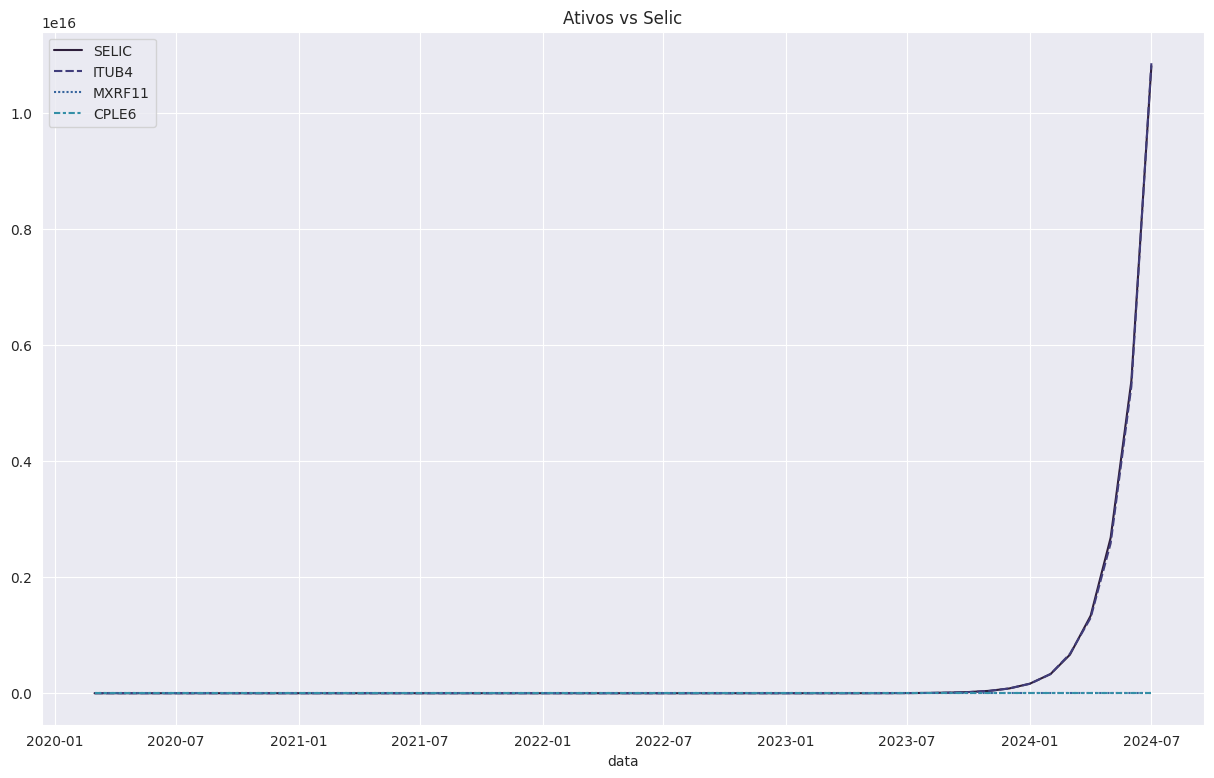

In [37]:
acumulado = dados.cumprod()

plt.figure(figsize=(15, 9))
sns.set_style('darkgrid')
sns.set_palette('mako')
plt.title('Ativos vs Selic')
sns.lineplot(data=acumulado)

<Axes: title={'center': 'Correlação do Retorno Acumulado'}>

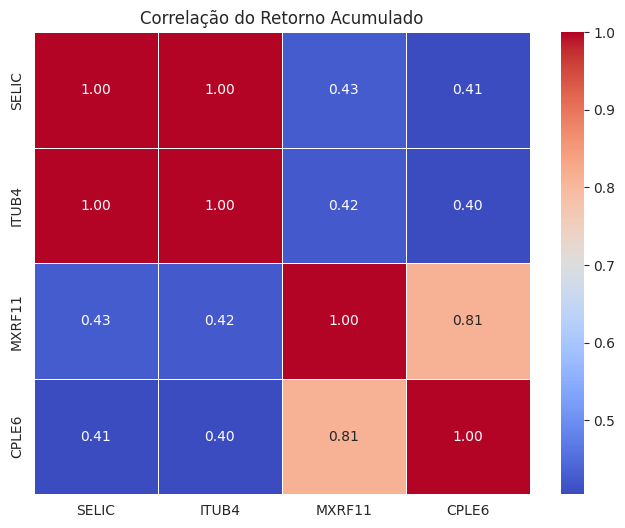

In [28]:
plt.figure(figsize=(8,6))
plt.title('Correlação do Retorno Acumulado')
sns.heatmap(acumulado.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)